# 90 input features, 2 hidden layers (5 nodes in each) and two output layers - 0:benign or 1:malignant

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
df = pd.read_csv('breast_cancer_weka_dataset.csv')
df.head(5)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.shape

(569, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              569 non-null    int64
 1   uniformity_of_cell_size      569 non-null    int64
 2   uniformity_of_cell_shape     569 non-null    int64
 3   marginal_adhesion            569 non-null    int64
 4   single_epithelial_cell_size  569 non-null    int64
 5   bare_nuclei                  569 non-null    int64
 6   bland_chromatin              569 non-null    int64
 7   normal_nucleoli              569 non-null    int64
 8   mitosis                      569 non-null    int64
 9   class                        569 non-null    int64
dtypes: int64(10)
memory usage: 44.6 KB


In [ ]:
# Separating the dataset into predictors and response

x = df.drop('class',axis = 1)
y = df['class']

In [ ]:
#Checking the number of negative cases and positive cases
print(y[y==2].shape[0], y[y==4].shape[0])

361 208


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


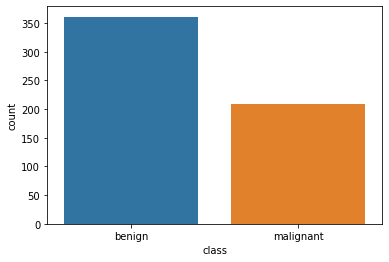

In [ ]:
g = sns.countplot(df['class'])
g.set_xticklabels(['benign','malignant'])
plt.show()

In [ ]:
# Creating dummies for the predictor variables

x = pd.get_dummies(x,columns = ['clump_thickness'])
x = pd.get_dummies(x,columns = ['uniformity_of_cell_size'])
x = pd.get_dummies(x,columns = ['uniformity_of_cell_shape'])
x = pd.get_dummies(x,columns = ['marginal_adhesion'])
x = pd.get_dummies(x,columns = ['single_epithelial_cell_size'])
x = pd.get_dummies(x,columns = ['bare_nuclei'])
x = pd.get_dummies(x,columns = ['bland_chromatin'])
x = pd.get_dummies(x,columns = ['normal_nucleoli'])
x = pd.get_dummies(x,columns = ['mitosis'])

In [ ]:
# we  modify the y so that the values 2 and 4 become 0 and 1 respectively

for i in range(0,len(y)):
    if y.iloc[i] == 2:
        y.iloc[i,] = 0
    else:
        y.iloc[i,] = 1

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
model = Sequential()

In [ ]:
# transform our target column into an array of binary numbers for classification

y_train = to_categorical(y_train)

In [ ]:
model.add(Dense(5,activation = 'relu',input_shape=(90,))) # first hidden layer(5 nodes), 90 = number of input features (number of columns in x)

In [ ]:
model.add(Dense(5,activation='relu')) # second hidden layer(5 nodes)

In [ ]:
# output layer - 5 neurons (y is 0 or 1) 0: benign, 1: malignant
# we use softmax function so that the sum of the predicted values from all the neurons in the o/p layer sum upto 1
model.add(Dense(2,activation='softmax')) 

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
15/15 [==============================] - 2s 2ms/step - loss: 0.6608 - accuracy: 0.7291
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7602
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.8154
Epoch 4/10
15/15 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.8144
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.8410
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.9158
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.9227
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.9401
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9447
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9595


In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([[0.93689245, 0.06310751],
       [0.5843113 , 0.41568872],
       [0.93342173, 0.06657825],
       [0.8325226 , 0.16747746],
       [0.92566067, 0.07433937],
       [0.20341164, 0.7965883 ],
       [0.10172921, 0.8982708 ],
       [0.9168886 , 0.08311142],
       [0.88543093, 0.11456909],
       [0.4229178 , 0.5770822 ],
       [0.12551048, 0.8744895 ],
       [0.93404335, 0.06595662],
       [0.16405384, 0.8359462 ],
       [0.8804667 , 0.11953326],
       [0.93404335, 0.06595662],
       [0.8693542 , 0.13064581],
       [0.10649159, 0.8935084 ],
       [0.93689245, 0.06310751],
       [0.9394482 , 0.06055187],
       [0.8642137 , 0.13578628],
       [0.12868899, 0.871311  ],
       [0.15185378, 0.8481462 ],
       [0.8438179 , 0.15618213],
       [0.8939005 , 0.10609947],
       [0.32876602, 0.67123395],
       [0.20239967, 0.79760027],
       [0.9394482 , 0.06055187],
       [0.09618886, 0.9038111 ],
       [0.9168886 , 0.08311142],
       [0.9362709 , 0.06372907],
       [0.

In [ ]:
# For each data-point, the two probabilities should sum to 1 and the higher the probability, the more confident is the
# algorithm that a datapoint belongs to the respective class.

In [ ]:
y_test

175    4
369    2
153    2
270    4
94     2
      ..
173    4
530    4
258    2
111    4
484    2
Name: class, Length: 114, dtype: int64

Random Forest classifier

In [ ]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ratio
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train_rf,Y_train_rf)

Y_pred_rf = clf.predict(X_test_rf)
print(classification_report(Y_test_rf, Y_pred_rf))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       102
           4       0.94      0.94      0.94        69

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_rf,Y_pred_rf)

array([[98,  4],
       [ 4, 65]])

TN = 98, FP = 4, FN = 4, TP = 65

In [ ]:
print("Recall = ", 65/(4+65) )

Recall =  0.9420289855072463


In [ ]:
print("Recall = ", 65/(4+65) )

Recall =  0.9420289855072463


In [ ]:
print("f1 score = ", 2*0.94*0.94/(0.94+0.94))

f1 score =  0.94
